# Mitigation Visualizations

## Set up

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import altair as alt

In [2]:
def print_column_info(df, col_name):
    """
    Print range, completeness, and data type of column with provided name and dataframe
    """
    print(f'COLUMN {col_name} | Range: {df[col_name].min()} to {df[col_name].max()} | NAs: {df[col_name].isna().sum()} | Type: {df[col_name].dtype}')

In [3]:
# load data
df = pd.read_csv('../../data/raw/rawdata_new.csv')

## Survey Overview

These visualizations are related to two questions on the survey:
* *Q5*: Which of the following measures do you currently implement on your farm and do you consider the measures effective for climate change mitigation?
* *Q6*: Which of the measures that you do not currently implement could you imagine to adopt in the future, which not?

These correspond to many features in the dataset. For each of the 13 mitigations, there are three columns. For example, the mitigation measure *"I keep my cows for at least 5 lactation periods."* has three related features:
* `breed` refers to whether the farmer has implemented the measure
    - 1=yes, 0=no
    - NA=not relevant
* `breed_eff` refers to whether the farmer considers the measure effective
    - 1=not effective at all, 2, 3, 4, 5=very effective
    - NA=don't know
* `breed_imag` refers to whether the farmer can imagine implementing the measure
    - 1=I can imagine to implement it, 0=I cannot imagine to implement it
    - NA=not relevant or already implemented

## Data transformation

### Quick sanity check
Are the mitigations implemented columns the size, type and range expected?

In [4]:
# define list of mitigation implemented columns
implemented_columns = ['legum', 'conc', 'add', 'lact', 'breed', 'covman', 'comp', 'drag', 'cov', 'plough', 'solar', 'biog', 'ecodr']
# quick sanity check
for col in implemented_columns:
    print_column_info(df, col)

COLUMN legum | Range: 1 to 3 | NAs: 0 | Type: int64
COLUMN conc | Range: 1 to 3 | NAs: 0 | Type: int64
COLUMN add | Range: 1 to 3 | NAs: 0 | Type: int64
COLUMN lact | Range: 1 to 3 | NAs: 0 | Type: int64
COLUMN breed | Range: 1 to 3 | NAs: 0 | Type: int64
COLUMN covman | Range: 1 to 3 | NAs: 0 | Type: int64
COLUMN comp | Range: 1 to 3 | NAs: 0 | Type: int64
COLUMN drag | Range: 1 to 2 | NAs: 0 | Type: int64
COLUMN cov | Range: 1 to 3 | NAs: 0 | Type: int64
COLUMN plough | Range: 1 to 3 | NAs: 0 | Type: int64
COLUMN solar | Range: 1 to 2 | NAs: 0 | Type: int64
COLUMN biog | Range: 2 to 2 | NAs: 0 | Type: int64
COLUMN ecodr | Range: 1 to 2 | NAs: 0 | Type: int64


Ok, well here is a surprise. The codebook says these measures will have values of 0, 1, and NA; instead, they have values of 1, 2, and 3. I'll see if I can figure out which values are which based on some exploration and (of course) assumptions. My bet is that farms with no animal units reported will consider the livestock mitigations not applicable.

In [5]:
# define list of mitigation effective columns
effective_columns = [c for c in df.columns if '_eff' in c]
# quick sanity check
for col in effective_columns:
    print_column_info(df, col)

COLUMN legum_eff | Range: 1.0 to 5.0 | NAs: 20 | Type: float64
COLUMN conc_eff | Range: 1.0 to 5.0 | NAs: 20 | Type: float64
COLUMN add_eff | Range: 1.0 to 5.0 | NAs: 31 | Type: float64
COLUMN lact_eff | Range: 1.0 to 5.0 | NAs: 29 | Type: float64
COLUMN breed_eff | Range: 1.0 to 4.0 | NAs: 44 | Type: float64
COLUMN covman_eff | Range: 1.0 to 5.0 | NAs: 19 | Type: float64
COLUMN comp_eff | Range: 1.0 to 5.0 | NAs: 30 | Type: float64
COLUMN drag_eff | Range: 1.0 to 5.0 | NAs: 12 | Type: float64
COLUMN cov_eff | Range: 1.0 to 5.0 | NAs: 13 | Type: float64
COLUMN plough_eff | Range: 1.0 to 5.0 | NAs: 10 | Type: float64
COLUMN solar_eff | Range: 1.0 to 5.0 | NAs: 16 | Type: float64
COLUMN biog_eff | Range: 1.0 to 5.0 | NAs: 26 | Type: float64
COLUMN ecodr_eff | Range: 1.0 to 5.0 | NAs: 9 | Type: float64


Lovely, these are in the expected range, completeness, and data type.

In [6]:
# define list of mitigation imaginable columns
imaginable_columns = [c for c in df.columns if '_imag' in c]
# quick sanity check
for col in imaginable_columns:
    print_column_info(df, col)

COLUMN legum_imag | Range: 0.0 to 1.0 | NAs: 84 | Type: float64
COLUMN conc_imag | Range: 0.0 to 1.0 | NAs: 83 | Type: float64
COLUMN add_imag | Range: 0.0 to 1.0 | NAs: 90 | Type: float64
COLUMN lact_imag | Range: 0.0 to 1.0 | NAs: 80 | Type: float64
COLUMN breed_imag | Range: 0.0 to 1.0 | NAs: 52 | Type: float64
COLUMN covman_imag | Range: 0.0 to 1.0 | NAs: 91 | Type: float64
COLUMN comp_imag | Range: 0.0 to 1.0 | NAs: 50 | Type: float64
COLUMN drag_imag | Range: 0.0 to 1.0 | NAs: 86 | Type: float64
COLUMN cov_imag | Range: 0.0 to 1.0 | NAs: 67 | Type: float64
COLUMN plough_imag | Range: 0.0 to 1.0 | NAs: 33 | Type: float64
COLUMN solar_imag | Range: 0.0 to 1.0 | NAs: 27 | Type: float64
COLUMN biog_imag | Range: 0.0 to 1.0 | NAs: 32 | Type: float64
COLUMN ecodr_imag | Range: 0.0 to 1.0 | NAs: 79 | Type: float64


Great, these are also in the expected range, completeness and data type.

### Create a mitigation dataframe

In [7]:
# convert implemented mitigations from wide to long format
implemented_df = pd.melt(df, id_vars='id', value_vars=implemented_columns, var_name='mitigation', value_name='implemented')
# set id and mitigation as index
implemented_df.set_index(['id', 'mitigation'], inplace=True)
# quick peek
implemented_df.sample(5)

,,implemented
id,mitigation,
33,drag,2
71,comp,2
84,comp,2
22,legum,2
57,cov,1


In [8]:
# convert effective mitigations from wide to long format
effective_df = pd.melt(df, id_vars='id', value_vars=effective_columns, var_name='mitigation', value_name='effective')
# remove suffix from mitigation name
effective_df['mitigation'] = [s[0:-len('_eff')] for s in effective_df['mitigation']]
# set id and mitigation as index
effective_df.set_index(['id', 'mitigation'], inplace=True)
# quick peek
effective_df.sample(5)

,,effective
id,mitigation,
58,drag,4.0
21,plough,1.0
32,biog,2.0
105,comp,3.0
19,lact,5.0


In [9]:
# convert imaginable mitigations from wide to long format
imaginable_df = pd.melt(df, id_vars='id', value_vars=imaginable_columns, var_name='mitigation', value_name='imaginable')
# remove suffix from mitigation name
imaginable_df['mitigation'] = [s[0:-len('_imag')] for s in imaginable_df['mitigation']]
# set id and mitigation as index
imaginable_df.set_index(['id', 'mitigation'], inplace=True)
# quick peek
imaginable_df.sample(5)

,,imaginable
id,mitigation,
57,solar,0.0
41,plough,1.0
42,legum,NaN
99,breed,0.0
53,covman,NaN


In [10]:
# create farm type and animal unit dataframe
farm_df = df[['id', 'farmtype']]
# set id as index
farm_df.set_index('id', inplace=True)

In [11]:
# join dataframes together
mitigation_df = implemented_df.copy()
mitigation_df = mitigation_df.join(effective_df)
mitigation_df = mitigation_df.join(imaginable_df)
mitigation_df = mitigation_df.join(farm_df, on='id')
# reset index for altair
mitigation_df.reset_index(inplace=True)
# quick peek
mitigation_df.head()

,id,mitigation,implemented,effective,imaginable,farmtype
0,1,legum,2,NaN,NaN,Livestock
1,2,legum,3,NaN,NaN,Arable farming
2,3,legum,2,4.0,1.0,Livestock
3,4,legum,2,3.0,1.0,Livestock
4,5,legum,2,3.0,NaN,Livestock


### Add features to dataframe

I'm adding the number of mitigations implemented, whether any mititgations are implemented, the number of applicable mitigations, and the proportion of applicable mitigations implemented on each farm.

These will be the features I try to predict with my linear regressions later on. I have a binary feature `any_implemented`, a continuous feature `num_implemented`, and a continuous feature normalized by the number of applicable features `prop_implemented`.

I'm most interested in proportion implemented, because it should account for the fact that certain farms can't implement certain mitigations (e.g. arable farms without livestock can't implement any livestock mitigtaions). However, it also assumes the farmers are knowledgeable enough about the mitigations to know if they apply to their farm. I want the metric to be high if farmers apply as many mitigations as possible. However, it could also be high if farmers mistakenly think few mititgations apply and they've done all they can. It would be useful to compare the number of possible mitigations across farm types and whether farmers can imagine implementing these mitigations.

In [12]:
# count total number of mitigations implemented, assuming 1 indicates implemented
df['num_implemented'] = (df[implemented_columns] == 1).sum(axis=1)
# see whether any mitigations are implemented
df['any_implemented'] = (df['num_implemented'] > 0).astype(int)
# count total number of mitigations applicable, assuming 3 indicates not applicable
df['num_applicable'] = (df[implemented_columns] != 3).sum(axis=1)
# calculate proportion of total applicable mitigations implemented
df['prop_implemented'] = df['num_implemented'] / df['num_applicable']

# quick check calculations are correct
cols_to_check = implemented_columns.copy()
cols_to_check.extend(['any_implemented', 'num_implemented', 'num_applicable', 'prop_implemented'])
df[cols_to_check]

,legum,conc,add,lact,breed,covman,comp,drag,cov,plough,solar,biog,ecodr,any_implemented,num_implemented,num_applicable,prop_implemented
0,2,2,2,3,2,2,2,1,1,2,2,2,1,1,3,12,0.250000
1,3,3,3,3,3,3,3,2,2,2,2,2,1,1,1,6,0.166667
2,2,2,2,1,2,2,2,2,2,2,2,2,1,1,2,13,0.153846
3,2,2,3,3,3,2,2,2,1,2,2,2,2,1,1,10,0.100000
4,2,2,2,2,2,1,2,2,2,2,2,2,1,1,2,13,0.153846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2,2,2,3,2,1,1,1,1,2,2,2,1,1,5,12,0.416667
101,3,3,3,3,3,3,1,2,1,2,2,2,2,1,2,7,0.285714
102,1,2,2,2,2,2,2,1,2,2,2,2,1,1,3,13,0.230769
103,1,2,2,3,2,1,2,1,2,1,2,2,1,1,5,12,0.416667


## Visualizations

### Do implemented mitigations differ by farm type?
And what does that tell me about which values are which for mitigation?

In [13]:
alt.Chart(mitigation_df).mark_bar().encode(
    x='count(implemented)',
    y=alt.Y('mitigation', sort=implemented_columns),
    color='implemented:N',
    column='farmtype'
)

alt.Chart(...)

I am going to assume the following:
* 3 (pink) = not applicable
* 2 (orange) = no, not implemented
* 1 (blue) = yes, implemented

I am assuming this based on the fact that the arable farming farms will not be able to implement livestock mitigations, so they will mostly answer not applicable followed by no not implemented. 

### What mitigations are implemented most and least often?

In [14]:
alt.Chart(mitigation_df).mark_bar().encode(
    x='count(implemented)',
    y=alt.Y('mitigation', sort=implemented_columns),
    color='implemented:N'
)

alt.Chart(...)

The ecodrive, draghose, cover crops, and cover manure mitigations are most implemented - over half of the farms surveyed have implemented these mitigations. The remaining mitigations are less popular, and about one third or fewer of farmers surveyed have implemented those mitigations on their farm. Biogas is the least popular, with 0 farmers surveyed having implemented it.

### What mitigations do farmers see as effective?
Reminder that 1=not effective at all, 2, 3, 4, 5=very effective and NA=don't know.

In [15]:
alt.Chart(mitigation_df).mark_bar().encode(
    x='count(effective)',
    y=alt.Y('mitigation', sort=implemented_columns),
    color='effective:O'
)

alt.Chart(...)

Draghose, solar, ecodrive, cover manure and legumes had the most very effective (5) and effective (4) ratings. Breed, additives, compost, and biogas had the most 'I don't know' (null) ratings.

### Does perceived effectiveness of mitigations differ by farm type?

In [16]:
alt.Chart(mitigation_df).mark_bar().encode(
    x='count(effective)',
    y=alt.Y('mitigation', sort=implemented_columns),
    color='effective:O',
    column='farmtype'
)

alt.Chart(...)

Unsurprisingly, arable farming farmers responded 'I don't know' about the livestock and manure management measures the most. Biogas was also often rated as 'I don't know' about its effectiveness. The livestock farmers were most unfamiliar with the effectiveness of breed.

### What mitigations can farmers imagine implementing?

In [17]:
alt.Chart(mitigation_df).mark_bar().encode(
    x='count(imaginable)',
    y=alt.Y('mitigation', sort=implemented_columns),
    color='imaginable:O'
)

alt.Chart(...)

Most farmers can imagine implementing solar. Fewest farmers can imagine implementing manure coverage.

### Does knowledge of mitigations differ by farm type?

In [18]:
alt.Chart(mitigation_df).mark_bar().encode(
    x='count(imaginable)',
    y=alt.Y('mitigation', sort=implemented_columns),
    color='imaginable:O',
    column='farmtype'
)

alt.Chart(...)

Arable farming farmers without the measures already can imagine implementing solar and cover crops more than other measures. Livestock farmers without the measures already can imagine implementing breed, solar and biogas.

### How many farms implement mitigations?
- How many mitigations are usually implemented?
- How many mitigations are applicable?
- How many farms are implementing as many mitigations as possible?

In [36]:
any_chart = alt.Chart(data=df).mark_bar().encode(x='any_implemented:N', y='count(any_implemented)')
num_chart = alt.Chart(data=df).mark_bar().encode(x='num_implemented:O', y='count(num_implemented)')
app_chart = alt.Chart(data=df).mark_bar().encode(x='num_applicable:O', y='count(num_applicable)')
prop_chart = alt.Chart(data=df).mark_bar().encode(x='prop_implemented:Q', y='count(prop_implemented)')
any_chart | num_chart | app_chart | prop_chart

alt.HConcatChart(...)

Most farms are implementing at least one mitigation, only 3 farms have no mitigations implemented.

No farms have all mitigations implemented; the maximum number of measures implemented is 10.

All farmers think at least 5 measures are possible on their farm. The most common number of applicable mitigations is 13, all of the mitigations. This suggests that farmers could be doing more to mitigate climate change on their farms and are aware of that.

The highest proportion of possible mitigations implemented is 85%. The minimum is three farms at 0%.

### Is there a relationship between the number of applicable mitigations and the number implemented?

In other words, do farmers who can apply more mitigations, implement more mitigations?

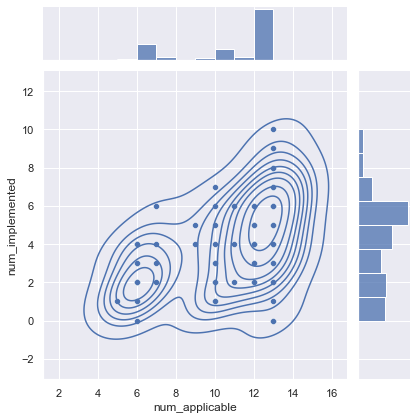

In [48]:
sns.set_theme()
g = sns.jointplot(data=df, x='num_applicable', y='num_implemented')
g.plot_joint(sns.kdeplot)

Farmers fall into two clusters here, with more implemented and more applicable, and with fewer implemented and fewer applicable. There does seem to be a positive relationship between the number of applicable mitigations and the number of implemented mitigations. It isn't clear why this is happening. Two possible explanations are that 1) farmers who think more mititgations are applicable are more knowledgeable about mitigations because they care about climate change and therefore implement more changes (care --> seek knowledge --> know more --> apply more) or whether 2) farmers are doing all that they can on their farms at a constant linear rate, which is why the proportion implemented histogram is pretty normally distributed.